In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import math
# import imageio
import os
import glob
# from PIL import Image 
# import random
import pylib

plt.rcParams.update({'font.size': 36})



Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)

In [7]:
main_load_folder = './data'

# the path for loading the fightbout info
fightBouts_info_path = os.path.join(main_load_folder, 'fightBouts.h5')

with h5py.File(fightBouts_info_path, 'r') as hf:
    fight_bout_info = hf['fight_bout_info'][:]
    fight_bout_info_noDurThresh = hf['fight_bout_info_noDurThresh'][:]
    
dt = 1/100

In [8]:
filename = './data/info_flow_vr_'+'17_'
T = 1
lag = 1

tau = int(30/dt) # window
l = int(10/dt) # interval

gap = 1
maxtau = int(5/dt/gap)
maxt= int(maxtau/T)


In [9]:
# use the 10 mintues definition of epoch
# SEM for error bar

w = int(10*60*100/l)
r1s,u11s,u21s,s1s = [],[],[],[]
r2s,u22s,u12s,s2s = [],[],[],[]

r1f,u11f,u21f,s1f = [],[],[],[]
r2f,u22f,u12f,s2f = [],[],[],[]

r1p,u11p,u21p,s1p = [],[],[],[]
r2p,u22p,u12p,s2p = [],[],[],[]

for expid in np.unique(fight_bout_info.T[0]):
# for expid in [0]:
    a = np.load(filename+str(expid)+'.npy',allow_pickle=1)
    if a[0][1]==0:
        continue
    mi11 = a[1][0]
    mi21 = a[1][2]
    mi121 = a[1][5]
    mi121[np.where(mi121<10**-2)] = np.nan
    r1 = np.min([mi11,mi21],axis=0)
    u11 = mi11 - r1
    u21 = mi21 - r1
    s1 = mi121 - u11 - u21 - r1
    r1 = r1/mi121
    u11 = u11/mi121
    u21 = u21/mi121
    s1 = s1/mi121
    
    mi22 = a[1][3]
    mi12 = a[1][1]
    mi212 = a[1][4]
    mi212[np.where(mi212<10**-2)] = np.nan
    r2 = np.min([mi22,mi12],axis=0)
    u22 = mi22 - r2
    u12 = mi12 - r2
    s2 = mi212 - u22 - u12 - r2
    r2 = r2/mi212
    u22 = u22/mi212
    u12 = u12/mi212
    s2 = s2/mi212
#     print(mi11[:10],mi21[:10],r1[:10],u11[:10],u21[:10])
    fs = fight_bout_info[np.where(fight_bout_info.T[0]==expid)][0,1]/l # take only first fight in the experiment
#     window1 = np.linspace(0,fs,int(fs),dtype='int')
    window1 = np.linspace(fs-w,fs,w,dtype='int') #10 min
    window1 = window1[np.where(window1>=0.)]
    r1s.append(np.mean(r1[window1]))
    u11s.append(np.mean(u11[window1]))
    u21s.append(np.mean(u21[window1]))
    s1s.append(np.mean(s1[window1]))
    r2s.append(np.mean(r2[window1]))
    u22s.append(np.mean(u22[window1]))
    u12s.append(np.mean(u12[window1]))
    s2s.append(np.mean(s2[window1]))
    
    fss = np.floor(fight_bout_info[np.where(fight_bout_info.T[0]==expid)][:,1]/l) # take only first fight in the experiment
    fes = np.floor(fight_bout_info[np.where(fight_bout_info.T[0]==expid)][:,2]/l) # take only first fight in the experiment
    for i in range(len(fss)):
        fs,fe = int(fss[i]),int(fes[i])
        window1 = np.linspace(fs,fe,fe-fs,dtype='int')
    #     window1 = window1[np.where(window1>=0.)]
        r1f.append(np.mean(r1[window1]))
        u11f.append(np.mean(u11[window1]))
        u21f.append(np.mean(u21[window1]))
        s1f.append(np.mean(s1[window1]))
        r2f.append(np.mean(r2[window1]))
        u22f.append(np.mean(u22[window1]))
        u12f.append(np.mean(u12[window1]))
        s2f.append(np.mean(s2[window1]))
    
    fe = fight_bout_info[np.where(fight_bout_info.T[0]==expid)][-1,2]/l # take only last fight in the experiment
#     window1 = np.linspace(fe,len(mi12)-1,int(len(mi12)-fe-1),dtype='int')
#     window1 = window1[np.where(window1<len(mi12))]
    window1 = np.linspace(fe,fe+w,w,dtype='int') # 10 min epoch
    window1 = window1[np.where(window1<len(mi12))]
    r1p.append(np.mean(r1[window1]))
    u11p.append(np.mean(u11[window1]))
    u21p.append(np.mean(u21[window1]))
    s1p.append(np.mean(s1[window1]))
    r2p.append(np.mean(r2[window1]))
    u22p.append(np.mean(u22[window1]))
    u12p.append(np.mean(u12[window1]))
    s2p.append(np.mean(s2[window1]))

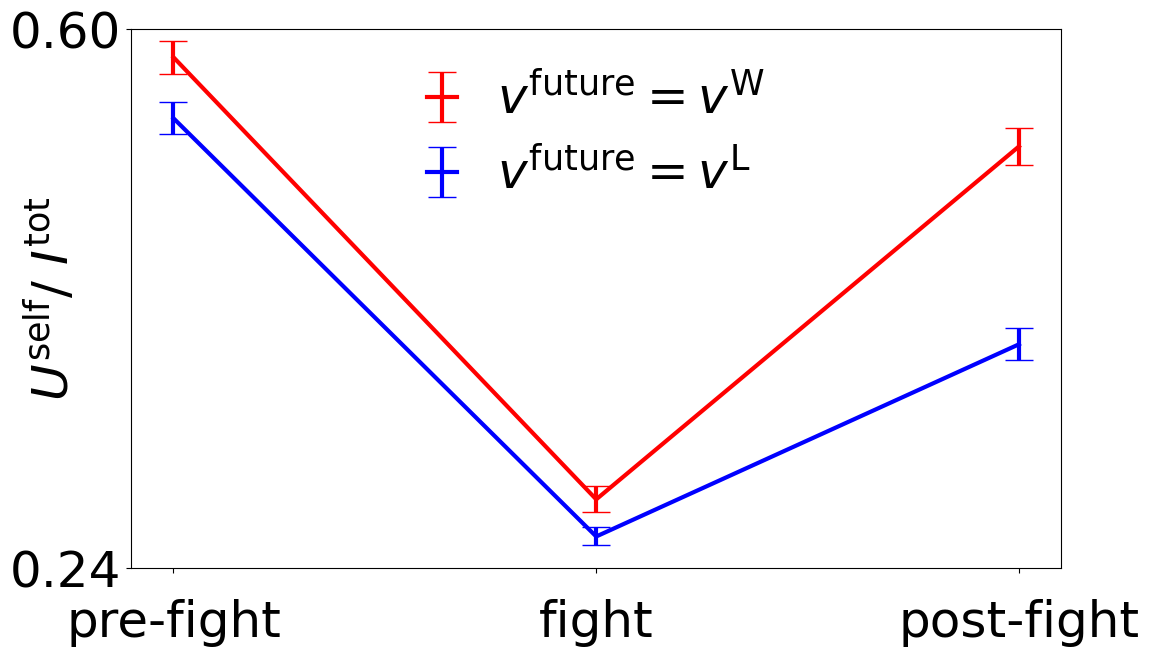

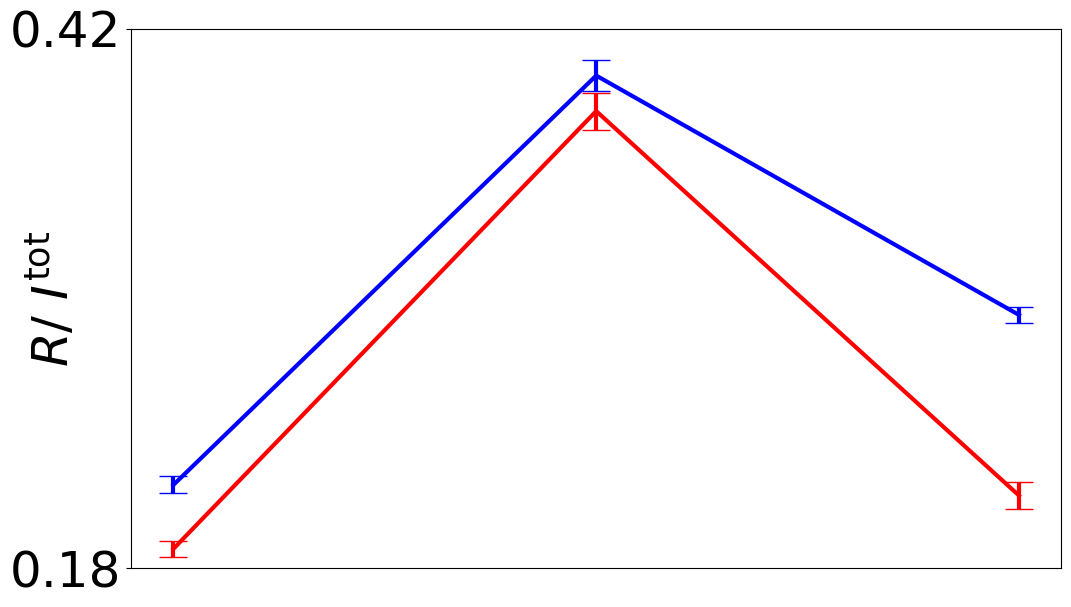

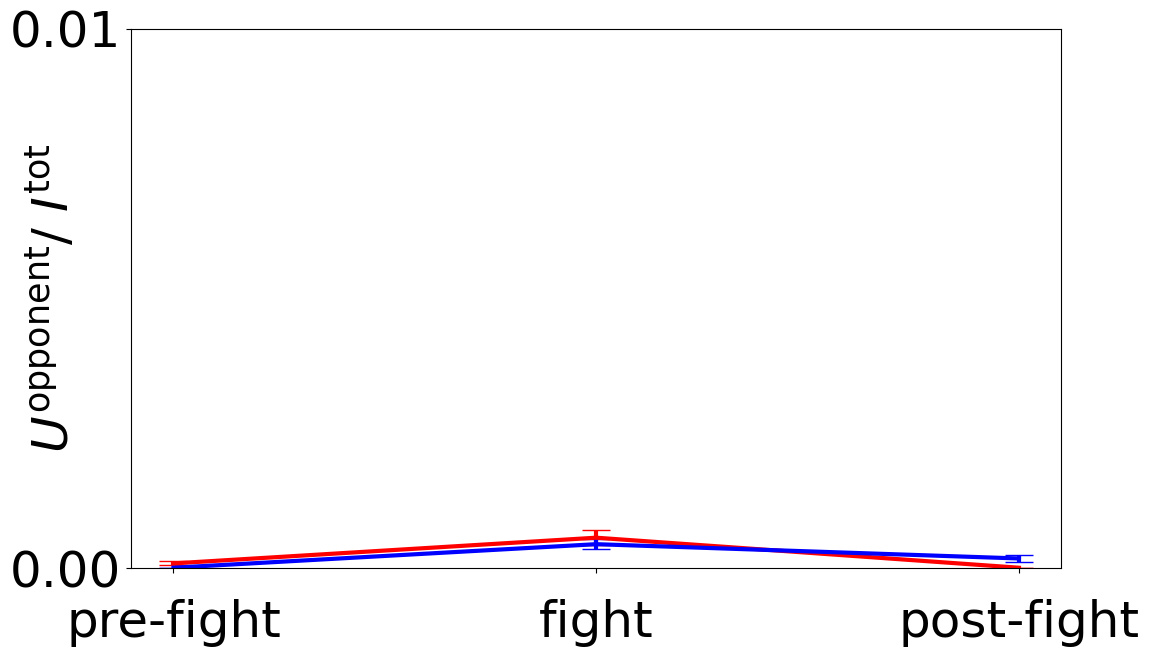

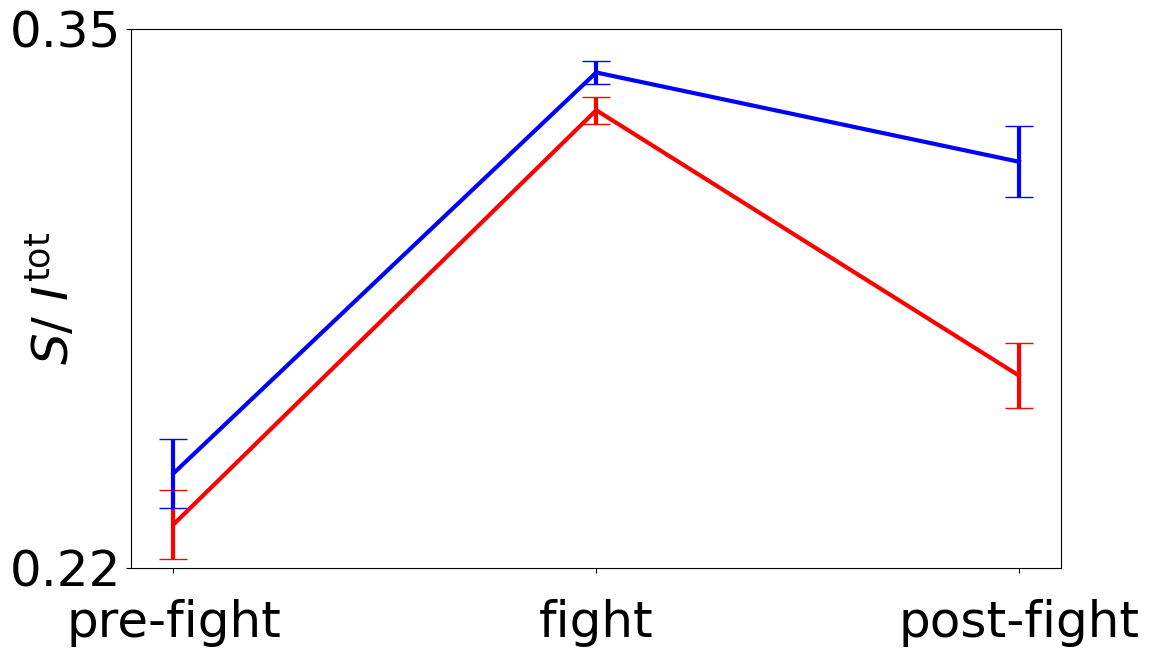

In [10]:
r1_m = np.nanmean(r1s)
u11_m = np.nanmean(u11s)
u21_m = np.nanmean(u21s)
s1_m = np.nanmean(s1s)
r1_s = np.nanstd(r1s)/np.sqrt(len((r1s)))
u11_s = np.nanstd(u11s)/np.sqrt(len(u11s))
u21_s = np.nanstd(u21s)/np.sqrt(len(u21s))
s1_s = np.nanstd(s1s)/np.sqrt(len(s1s))
r2_m = np.nanmean(r2s)
u22_m = np.nanmean(u22s)
u12_m = np.nanmean(u12s)
s2_m = np.nanmean(s2s)
r2_s = np.nanstd(r2s)/np.sqrt(len(r2s))
u22_s = np.nanstd(u22s)/np.sqrt(len((u22s)))
u12_s = np.nanstd(u12s)/np.sqrt(len((u12s)))
s2_s = np.nanstd(s2s)/np.sqrt(len((s2s)))

r1_m_f = np.nanmean(r1f)
u11_m_f = np.nanmean(u11f)
u21_m_f = np.nanmean(u21f)
s1_m_f = np.nanmean(s1f)
r1_s_f = np.nanstd(r1f)/np.sqrt(len((r1f)))
u11_s_f = np.nanstd(u11f)/np.sqrt(len((u11f)))
u21_s_f = np.nanstd(u21f)/np.sqrt(len((u21f)))
s1_s_f = np.nanstd(s1f)/np.sqrt(len((s1f)))
r2_m_f = np.nanmean(r2f)
u22_m_f = np.nanmean(u22f)
u12_m_f = np.nanmean(u12f)
s2_m_f = np.nanmean(s2f)
r2_s_f = np.nanstd(r2f)   /np.sqrt(len((r2f)))
u22_s_f = np.nanstd(u22f)   /np.sqrt(len((u22f)))
u12_s_f = np.nanstd(u12f)  /np.sqrt(len((u12f)))
s2_s_f = np.nanstd(s2f)  /np.sqrt(len((s2f)))

r1_m_p = np.nanmean(r1p)
u11_m_p = np.nanmean(u11p)
u21_m_p = np.nanmean(u21p)
s1_m_p = np.nanmean(s1p)
r1_s_p = np.nanstd(r1p) /np.sqrt(len((r1p)))
u11_s_p = np.nanstd(u11p) /np.sqrt(len((u11p)))
u21_s_p = np.nanstd(u21p) /np.sqrt(len((u21p)))
s1_s_p = np.nanstd(s1p) /np.sqrt(len((s1p)))
r2_m_p = np.nanmean(r2p)
u22_m_p = np.nanmean(u22p)
u12_m_p = np.nanmean(u12p)
s2_m_p = np.nanmean(s2p)
r2_s_p = np.nanstd(r2p) /np.sqrt(len((r2p)))
u22_s_p = np.nanstd(u22p) /np.sqrt(len((u22p)))
u12_s_p = np.nanstd(u12p) /np.sqrt(len((u12p)))
s2_s_p = np.nanstd(s2p) /np.sqrt(len((s2p)))

# r2_s = bootstrap_mean(np.concatenate(r2s))
# u22_s = bootstrap_mean(np.concatenate(u22s))

plt.figure(figsize=[12,7])
x = [0,1,2]
plt.errorbar(x,[u11_m,u11_m_f,u11_m_p],yerr=[u11_s/2,u11_s_f/2,u11_s_p/2],color='r',lw=3,capsize=10)
plt.errorbar(x,[u22_m,u22_m_f,u22_m_p],yerr=[u22_s/2,u22_s_f/2,u22_s_p/2],color='b',lw=3,capsize=10)
xticklabels = list(['pre-fight','fight','post-fight'])
plt.xticks(x,labels=xticklabels)
plt.yticks([0.24,0.6])
plt.ylim([0.24,0.6])
plt.ylabel('$U^\mathrm{self} /\ I^\mathrm{tot}$', labelpad=-50)
plt.legend(['$v^\mathrm{future}=v^\mathrm{W}$', '$v^\mathrm{future}=v^\mathrm{L}$'],handlelength=.6,framealpha=0.,loc='best')
xticks = plt.gca().get_xticklabels()
for tick in xticks:
    tick.set_y(-0.04)
plt.show()

plt.figure(figsize=[12,7])
x = [0,1,2]
x2 = [.19,1,1.81]
plt.errorbar(x,[r1_m,r1_m_f,r1_m_p],yerr=[r1_s/2,r1_s_f/2,r1_s_p/2],color='r',capsize=10,lw=3)
plt.errorbar(x,[r2_m,r2_m_f,r2_m_p],yerr=[r2_s/2,r2_s_f/2,r2_s_p/2],color='b',capsize=10,lw=3)
xticklabels = list(['pre-fight','fight','post-fight'])
plt.xticks([])
plt.yticks([0.18,0.42])
plt.ylim([0.18,0.42])
plt.ylabel('$R /\ I^\mathrm{tot}$', labelpad=-50)
# plt.legend(['$v^\mathrm{future}=v^\mathrm{W}$', '$v^\mathrm{future}=v^\mathrm{L}$'],handlelength=.6,framealpha=0.,loc='best')
xticks = plt.gca().get_xticklabels()
for tick in xticks:
    tick.set_y(-0.04)
plt.gca().tick_params(axis='x', length=0)
plt.show()

plt.figure(figsize=[12,7])
x = [0,1,2]
plt.errorbar(x,[u21_m,u21_m_f,u21_m_p],yerr=[u21_s/2,u21_s_f/2,u21_s_p/2],color='r',lw=3,capsize=10)
plt.errorbar(x,[u12_m,u12_m_f,u12_m_p],yerr=[u12_s/2,u12_s_f/2,u12_s_p/2],color='b',lw=3,capsize=10)
xticklabels = list(['pre-fight','fight','post-fight'])
plt.xticks(x,labels=xticklabels)
plt.yticks([0,0.01])
plt.ylim([0,0.01])
plt.ylabel('$U^\mathrm{opponent} /\ I^\mathrm{tot}$', labelpad=-50)
# plt.legend(['$v^\mathrm{future}=v^\mathrm{W}$', '$v^\mathrm{future}=v^\mathrm{L}$'],handlelength=.6,framealpha=0.,loc='best')
xticks = plt.gca().get_xticklabels()
for tick in xticks:
    tick.set_y(-0.04)
plt.show()
plt.figure(figsize=[12,7])
x = [0,1,2]
plt.errorbar(x,[s1_m,s1_m_f,s1_m_p],yerr=[s1_s/2,s1_s_f/2,s1_s_p/2],color='r',capsize=10,lw=3)
plt.errorbar(x,[s2_m,s2_m_f,s2_m_p],yerr=[s2_s/2,s2_s_f/2,s2_s_p/2],color='b',capsize=10,lw=3)
xticklabels = list(['pre-fight','fight','post-fight'])
plt.xticks(x,labels=xticklabels)
# plt.yticks([0.2,0.3,0.4])
plt.ylabel('$S /\ I^\mathrm{tot}$', labelpad=-50)
plt.yticks([0.22,0.35])
plt.ylim([0.22,0.35])
# plt.legend(['$v^\mathrm{future}=v^\mathrm{W}$', '$v^\mathrm{future}=v^\mathrm{L}$'],handlelength=.6,framealpha=0.,loc='best')
xticks = plt.gca().get_xticklabels()
for tick in xticks:
    tick.set_y(-0.04)
plt.show()

In [11]:
filename = './data/windowsize_7_'

T = 1

lag = 1#maxt#1

gap = 1

maxtau = int(5/dt/gap)

maxt= int(maxtau/T)

range_w=np.linspace(6*100,2*60*100,20,dtype=int)

n_windows=100#0


In [12]:
def sem(a):
    a = np.ma.masked_invalid(a).T
    return np.array([np.nanstd(b)/np.sqrt(len(b.compressed())) for b in a])
#     return np.array([np.nanstd(b) for b in a])

In [17]:
mean = []
# for expid in np.unique(fight_bout_info[:,0]):
for expid in range(22):
    try:
#         print('data at '+str(expid))
        a = np.load(filename+str(expid)+'.npy',allow_pickle=1)
#         plt.plot(range_w/100,np.mean(a,axis=1),lw=.3)
        mean.append(np.mean(a,axis=1))
    except:
        print('no data at '+str(expid))


no data at 4
no data at 6
no data at 9
no data at 16
no data at 17
no data at 21


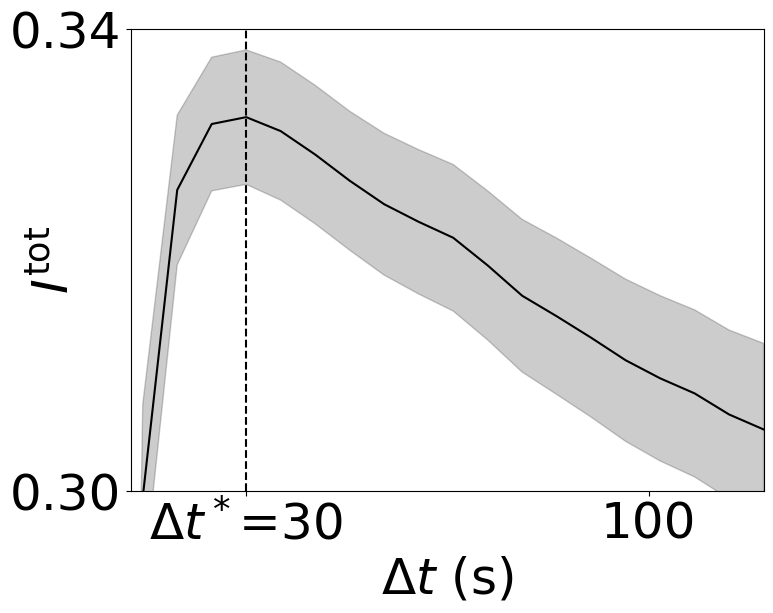

In [18]:
plt.figure(figsize=[6.8*1.2, 5*1.2])
plt.plot(range_w/100,np.mean(mean,axis=0),c='k')
plt.fill_between(range_w/100,np.mean(mean,axis=0)-.5*sem(mean),np.mean(mean,axis=0)+.5*sem(mean),alpha=.2,color='k')
plt.xlabel('$\Delta t$ (s)')
plt.ylabel('$I^\mathrm{tot}$', labelpad=-50)
plt.xlim([10,2*60])
plt.ylim([.31,.34])
plt.axvline(30,c='k',ls='--')
plt.xticks([30, 100], ['$\Delta t^*$=30', '100'])
plt.yticks([.31, .34], ['0.30', '0.34'])

# plt.yscale('log')
plt.show()